In [22]:
import pandas as pd
from sdv.single_table import TVAESynthesizer

from domias.evaluator import evaluate_performance
from domias.models.generator import GeneratorInterface
from domias.models.ctgan import CTGAN
from sdv.metadata import SingleTableMetadata


from scipy import stats
from scipy.stats import multivariate_normal


import numpy as np

from itertools import zip_longest

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing, fetch_covtype, load_digits

import warnings
warnings.filterwarnings("ignore")

In [23]:
#Import dataset
df_uci = pd.read_csv(r'C:\Users\jordy\OneDrive\MSc_Python\Individual_Project\Data\UCI_Credit_Card.csv')
df_uci.drop(columns=['ID'], inplace=True)
df_uci.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [28]:
# #convert dataframe to array
# arr_uci = np.array(df_uci.iloc[:, 1:])
# arr_uci.shape

(30000, 24)

In [29]:
# def get_dataset() -> np.ndarray:
#     def data_loader() -> np.ndarray:
#         scaler = StandardScaler()
#         X =arr_uci
#         np.random.shuffle(X)
#         return scaler.fit_transform(X)

#     return data_loader()

In [24]:
def get_generator(
    gan_method: str = "CTGAN",
    epochs: int = 1000,
    seed: int = 0,
) -> GeneratorInterface:
    class LocalGenerator(GeneratorInterface):
        def __init__(self) -> None:
            if gan_method == "TVAE":
                syn_model = TVAESynthesizer(metadata, epochs=epochs)
            elif gan_method == "CTGAN":
                syn_model = CTGAN(epochs=epochs)
            elif gan_method == "KDE":
                syn_model = None
            else:
                raise RuntimeError()
            self.method = gan_method
            self.model = syn_model
                

        def fit(self, data: pd.DataFrame) -> "LocalGenerator":
            if self.method == "KDE":
                self.model = stats.gaussian_kde(np.transpose(data))
            else:
                self.model.fit(data)
            return self

        def generate(self, count: int) -> pd.DataFrame:
            
            if gan_method == "KDE":
                samples = pd.DataFrame(self.model.resample(count).transpose(1, 0))
            elif gan_method == "TVAE":
                samples = self.model.sample(count)
            elif gan_method == "CTGAN":
                samples = self.model.generate(count)
            else:
                raise RuntimeError()

            return samples
            
            #return self.model.sample(count)

    return LocalGenerator()


#Loading metadata from dataset for use in TVAESynthesizer

# from sdv.metadata import SingleTableMetadata

# metadata = SingleTableMetadata()
# metadata.detect_from_dataframe(data=df_dataset)







In [6]:
# def get_generator(
#     gan_method: str = "CTGAN",
#     metadata: SingleTableMetadata = None,
#     epochs: int = 1000,
#     seed: int = 0,
# ) -> GeneratorInterface:
#     class LocalGenerator(GeneratorInterface):
#         def __init__(self, metadata=None) -> None:
#             if gan_method == "TVAE":
#                 self.model = TVAESynthesizer(metadata=metadata, epochs=epochs)
#             elif gan_method == "CTGAN":
#                 self.model = CTGAN(epochs=epochs)
#             elif gan_method == "KDE":
#                 self.model = None
#             else:
#                 raise RuntimeError("Unknown GAN method specified.")
#             self.method = gan_method
#             self.metadata = metadata

#         def fit(self, data: pd.DataFrame) -> "LocalGenerator":
#             if self.method == "KDE":
#                 self.model = stats.gaussian_kde(np.transpose(data))
#             else:
#                 self.model.fit(data)
#             return self

#         def generate(self, count: int) -> pd.DataFrame:
#             if self.method == "KDE":
#                 samples = pd.DataFrame(self.model.resample(count).transpose(1, 0))
#             elif self.method == "TVAE":
#                 samples = self.model.sample(count)
#             elif self.method == "CTGAN":
#                 samples = self.model.generate(count)
#             else:
#                 raise RuntimeError("Unknown GAN method specified.")
#             return samples

#     return LocalGenerator(metadata=metadata)



# #Loading metadata from dataset for use in TVAESynthesizer
# dataset = get_dataset()
# df_dataset = pd.DataFrame(dataset)
# df_dataset.rename(columns={0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8:'8', 9:'9', 10:'10', 11:'11', 12:'12',
#                           13:'13', 14:'14', 15:'15', 16:'16', 17:'17', 18:'18', 19:'19', 20:'20', 21:'21', 22:'22', 23:'23'}, inplace = True)


In [31]:
# dataset = get_dataset()
# df_dataset = pd.DataFrame(dataset)
# df_dataset.rename(columns={0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8:'8', 9:'9', 10:'10', 11:'11', 12:'12',
#                           13:'13', 14:'14', 15:'15', 16:'16', 17:'17', 18:'18', 19:'19', 20:'20', 21:'21', 22:'22', 23:'23', 24:'24'}, inplace = True)


# #Create loop to create a metadta object for each column ablated dataframe
# metadata_objects={}
# for i, col in enumerate(df_dataset.columns):
    
#     df_temp = df_dataset.copy()
#     df_temp.drop(columns=[col], inplace=True)
    
#     metadata_name = f"metadata_{col}"
#     metadata_objects[metadata_name] = SingleTableMetadata()
#     metadata_objects[metadata_name].detect_from_dataframe(data=df_temp)

# #metadata_objects[metadata_1]
# #print(type(metadata_objects['metadata_1']))
# #metadata_objects['metadata_1']

In [33]:

# # #Create loop to create a metadta object for each column ablated dataframe
# # metadata_objects={}
# # for i, col in enumerate(df_dataset.columns):
    
# #     df_temp = df_dataset.copy()
# #     df_temp.drop(columns=[col], inplace=True)
    
# #     metadata_name = f"metadata_{col}"
# #     metadata_objects[metadata_name] = SingleTableMetadata()
# #     metadata_objects[metadata_name].detect_from_dataframe(data=df_temp)

# # mem_set_size = 1000 -> originally what training size was
# reference_set_size = 10000 #held out set
# training_epochs = [2000]
# training_sizes = [10000]
# #synthetic_sizes = [200]
# density_estimator = "kde"  # prior, kde, bnaf
# gen_size = 500 #same as synthetic_sizes

# method = "TVAE"

# leave_one_out_results = {}


# for col, key in zip(df_dataset.columns, metadata_objects.keys()):
#     print(col)
#     print(key)
    
    
#     metadata = metadata_objects[key]
#     #print(type(metadata))
#     print(metadata)
    
#     df_temp = df_dataset.drop(columns=[col])
# #     df_temp.drop(columns=[col], inplace=True)
# #     df_temp.rename(columns={'0': 0}, inplace=True)
#     print(df_temp.columns)
#     arr_temp = np.array(df_temp)
    
#     #print(arr_temp)
    

    
    

#     # Create a dictionary to store the results for the current column
#     column_results = {}

#     # Set the number of iterations
#     num_iterations = 10

#     for iteration in range(1, num_iterations+1):
#         # Initialize the result dictionary for the current iteration
#         iteration_results = {}

#         for training_size in training_sizes:
#             # Initialize the result dictionary for the current training size
#             size_results = {}

#             for training_epoch in training_epochs:
#                 generator = get_generator(
#                     gan_method=method,
#                     epochs=training_epoch,
#                 )

#                 perf = evaluate_performance(
#                     generator,
#                     arr_temp,
#                     training_size,
#                     reference_set_size,
#                     training_epochs=training_epoch,
#                     synthetic_sizes=[gen_size],
#                     density_estimator=density_estimator,
#                 )

#                 # Store the MIA performance for the current training size and epoch
#                 size_results[training_epoch] = perf[gen_size]["MIA_performance"]

#             # Store the results for the current training size
#             iteration_results[training_size] = size_results

#         # Store the results for the current iteration
#         column_results[iteration] = iteration_results
    
#     # Store the results for the current column
#     leave_one_out_results[col] = column_results
    

# # Print the results
# for col, results in leave_one_out_results.items():
#     print(f"Column Omitted {col}:")
#     for iteration, iteration_results in results.items():
#         print(f"Iteration {iteration}:")
#         for training_size, size_results in iteration_results.items():
#             print(f"Training Size {training_size}:")
#             for training_epoch, mia_performance in size_results.items():
#                 print(f"Training Epoch {training_epoch}: MIA Performance = {mia_performance}")
#             print()

0
metadata_0
{
    "columns": {
        "1": {
            "sdtype": "numerical"
        },
        "2": {
            "sdtype": "numerical"
        },
        "3": {
            "sdtype": "numerical"
        },
        "4": {
            "sdtype": "numerical"
        },
        "5": {
            "sdtype": "numerical"
        },
        "6": {
            "sdtype": "numerical"
        },
        "7": {
            "sdtype": "numerical"
        },
        "8": {
            "sdtype": "numerical"
        },
        "9": {
            "sdtype": "numerical"
        },
        "10": {
            "sdtype": "numerical"
        },
        "11": {
            "sdtype": "numerical"
        },
        "12": {
            "sdtype": "numerical"
        },
        "13": {
            "sdtype": "numerical"
        },
        "14": {
            "sdtype": "numerical"
        },
        "15": {
            "sdtype": "numerical"
        },
        "16": {
            "sdtype": "numerical"
        },
 

InvalidDataError: The provided data does not match the metadata:
The columns ['0'] are not present in the metadata.

The metadata columns ['23'] are not present in the data.

In [ ]:
# # Create empty lists to store the results
# iterations = []
# epochs = []
# srcs = []
# aucrocs = []
# column_ablated = []

# # Iterate over the results
# for col, results in leave_one_out_results.items():
#     for iteration, iteration_results in results.items():
#         for training_size, size_results in iteration_results.items():
#             for training_epoch, mia_performance in size_results.items():
#                 # Append values to the lists
#                 iterations.append(iteration)
#                 epochs.append(training_epoch)
#                 srcs.append(list(mia_performance.keys())[8])
#                 aucrocs.append(list(mia_performance.values())[8]['aucroc'])
#                 column_ablated.append(col)  # Add the column_ablated value

# # Create a list of dictionaries containing the data
# data_list = [{'column_ablated': column, 'iteration': iteration, 'epoch': epoch, 'src': src, 'aucroc': aucroc}
#              for column, iteration, epoch, src, aucroc in zip(column_ablated, iterations, epochs, srcs, aucrocs)]

# # Create a DataFrame from the list of dictionaries
# data = pd.DataFrame(data_list)

# # Convert data types if needed
# data['iteration'] = data['iteration'].astype(int)
# data['epoch'] = data['epoch'].astype(int)
# data['aucroc'] = data['aucroc'].astype(float)
# data.to_csv('domias_kde_col_abl_UCI_TVAE_fix.csv')
# data

In [ ]:
# mean_values = data.groupby('column_ablated')['aucroc'].mean()

# print(mean_values)

In [ ]:
# sns.barplot(data=data, x='column_ablated', y='aucroc' )

# # Customize the plot
# plt.xlabel('Column ablated')
# plt.ylabel('AUC-ROC')
# plt.title('MIA Performance for Column Ablation Study')
# plt.ylim(ymin=0.475, ymax=0.525)
# #plt.legend(title='src')
# #plt.grid(True)
# plt.show()

In [ ]:
# for col, results in leave_one_out_results.items():
#     print(f"Column Omitted {col}:")
#     for iteration, iteration_results in results.items():
#         print(f"Iteration {iteration}:")
#         for training_size, size_results in iteration_results.items():
#             print(f"Training Size {training_size}:")
#             for training_epoch, mia_performance in size_results.items():
#                 print(f"Training Epoch {training_epoch}: MIA Performance = {mia_performance}")
#             print()


# # Create empty lists to store the results
# epochs = []
# srcs = []
# aucrocs = []


# # Iterate over the results
# for col, results in leave_one_out_results.items():
#     for iteration, iteration_results in results.items():
#         for training_size, size_results in iteration_results.items():
#             for training_epoch, mia_performance in size_results.items():
#                 epochs.append(training_epoch)
#                 srcs.append(list(mia_performance.keys()))
#                 aucrocs.append([value['aucroc'] for value in mia_performance.values()])

# # Create a DataFrame from the lists
# data = pd.DataFrame({'epoch': epochs, 'src': srcs, 'aucroc': aucrocs})

# # Convert lists to individual rows
# data = data.explode('src').explode('aucroc')

# # Convert data types
# data['epoch'] = data['epoch'].astype(int)
# data['aucroc'] = data['aucroc'].astype(float)

# #print(data.head())

# #Filtering for just domias results
# filtered_df = data[data['src'] == 'domias']

# filtered_df.reset_index(inplace=True)


# print(filtered_df.head())
# print(filtered_df.shape)

In [ ]:
# filtered_df[filtered_df['index'] == 0].count()

In [ ]:
# sns.barplot(data=filtered_df, x='index', y='aucroc')

# # Customize the plot
# plt.xlabel('Column ablated')
# plt.ylabel('AUC-ROC')
# plt.title('MIA Performance for Column Ablation Study')
# plt.ylim(ymin=0.4, ymax=0.6)
# #plt.legend(title='src')
# #plt.grid(True)
# plt.show()

In [11]:

# #         def __init__(self) -> None:
# #             if gan_method == "TVAE":
# #                 syn_model = TVAESynthesizer(metadata, epochs=epochs)
# #             elif gan_method == "CTGAN":
# #                 syn_model = CTGAN(epochs=epochs)
# #             elif gan_method == "KDE":
# #                 syn_model = None
# #             else:
# #                 raise RuntimeError()
# #             self.method = gan_method
# #             self.model = syn_model



# def get_generator(gan_method: str = "TVAE", epochs: int = 1000, metadata = None) -> GeneratorInterface:
#     class LocalGenerator(GeneratorInterface):
#         def __init__(self, metadata=None) -> None:
#             self.metadata = metadata
#             if gan_method == "TVAE":
#                 syn_model = TVAESynthesizer(metadata, epochs=epochs)
#             elif gan_method == "KDE":
#                 syn_model = None
#             else:
#                 raise RuntimeError()
                
#             self.method = gan_method
#             self.model = syn_model

#         def fit(self, data: pd.DataFrame) -> "LocalGenerator":
#             if gan_method == "KDE":
#                 self.model = stats.gaussian_kde(np.transpose(data))
#             else:
#                 self.model.fit(data)
#             return self

#         def generate(self, count: int) -> pd.DataFrame:
#             if gan_method == "KDE":
#                 samples = pd.DataFrame(self.model.resample(count).transpose(1, 0))
#             elif gan_method == "TVAE":
#                 samples = self.model.sample(count)
#             else:
#                 raise RuntimeError()

#             return samples

#     return LocalGenerator()


# leave_one_out_results = {}
# metadata_objects = {}

# for i, col in enumerate(df_dataset.columns):
#     print(col)
    
#     df_temp = df_dataset.copy()
#     df_temp.drop(columns=[col], inplace=True)
#     arr_temp = np.array(df_temp)

#     # Create a new metadata object for each loop iteration with a unique name
#     metadata_name = f"metadata_{col}"
#     metadata_objects[metadata_name] = SingleTableMetadata()
#     metadata_objects[metadata_name].detect_from_dataframe(data=df_temp)
#     print(type(metadata_objects[metadata_name]))

#     # Create the generator using the corresponding metadata
#     generator = get_generator(
#         epochs=training_epochs[0],  # Assuming you only use the first epoch in the list
#         metadata=metadata_objects[metadata_name]
#     )

In [10]:

# # mem_set_size = 1000 -> originally what training size was
# reference_set_size = 10000 #held out set
# training_epochs = [2000]
# training_sizes = [10000]
# #synthetic_sizes = [200]
# density_estimator = "kde"  # prior, kde, bnaf
# gen_size = 500 #same as synthetic_sizes

# method = "TVAE"

# leave_one_out_results = {}
# metadata_objects={}


# leave_one_out_results = {}
# metadata_objects = {}

# for i, col in enumerate(df_dataset.columns):
#     print(col)
    
#     df_temp = df_dataset.copy()
#     df_temp.drop(columns=[col], inplace=True)
#     arr_temp = np.array(df_temp)

#     # Create a new metadata object for each loop iteration with a unique name
#     metadata_name = f"metadata_{col}"
#     metadata_objects[metadata_name] = SingleTableMetadata()
#     metadata = metadata_objects[metadata_name].detect_from_dataframe(data=df_temp)

#     # Create the generator using the corresponding metadata
#     generator = get_generator(
#         gan_method=method,
#         epochs=training_epochs[0],  # Assuming you only use the first epoch in the list
#         metadata=metadata,
#     )

#     # Rest of your code for evaluation and storing results...


0
LIMIT_BAL
(30000, 23)
             0         1         2         3         4         5         6   \
0     -1.234323  0.185828 -1.057295 -0.486615  0.904712  1.782348  0.138865   
1      0.810161  0.185828 -1.057295 -0.269643  0.014861  0.111736  0.138865   
2      0.810161 -1.079457  0.858557  1.900084  0.014861  0.111736  0.138865   
3      0.810161  0.185828 -1.057295  0.055816  0.014861  0.111736  0.138865   
4      0.810161  0.185828 -1.057295 -0.052670  0.014861  0.111736  0.138865   
...         ...       ...       ...       ...       ...       ...       ...   
29995  0.810161  0.185828  0.858557 -1.029047  0.014861  0.111736  0.138865   
29996  0.810161 -1.079457 -1.057295  1.683111  0.014861  0.111736  0.138865   
29997  0.810161 -1.079457 -1.057295 -0.269643 -1.764843 -1.558876 -1.532192   
29998  0.810161  0.185828 -1.057295  1.249166 -1.764843 -1.558876 -1.532192   
29999  0.810161  1.451114 -1.057295  0.706734  0.014861  0.111736  0.138865   

             7         8   

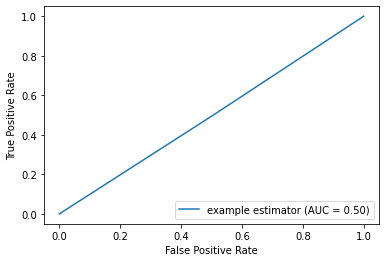

fpr: [0.    0.503 1.   ]
tpr: [0.    0.497 1.   ]
p_G_evaluated
[2.55794754e-07 1.00460088e-03 2.22203262e-07 ... 1.48117239e-12
 5.95944608e-14 4.97390399e-05]
p_R_evaluated
[4.05523590e-07 8.62113134e-06 8.37373319e-07 ... 5.98606583e-08
 3.47357699e-09 1.23524806e-06]
test1
Synth_set
            0         1         2         3         4         5         6  \
0    0.808448  0.184383  0.859243 -0.373560  0.016687  0.111771  0.138494   
1    0.810161  0.185055 -1.057592  0.471873  0.015979  0.111000  0.140003   
2    0.808576  0.185169  0.858512 -0.879661  0.015161  0.111432  0.140993   
3    0.809532 -1.079375  0.858780 -0.956953  0.014626  0.112226  0.139332   
4   -1.234323  1.453758 -1.057179  2.508184  0.014712  0.111933  0.137262   
..        ...       ...       ...       ...       ...       ...       ...   
495 -1.234323  1.451249 -1.054831  0.671874  1.799093  1.786007  1.806903   
496  0.808509 -1.079291  0.857379 -1.244527  0.905912  1.782461  0.139887   
497 -1.234211  0.18

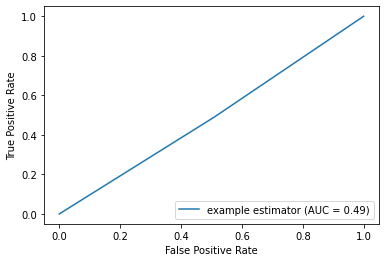

fpr: [0.         0.50966667 1.        ]
tpr: [0.         0.49033333 1.        ]
p_G_evaluated
[2.21931661e-08 9.40347230e-04 4.85121332e-06 ... 1.23892618e-15
 1.18461472e-12 6.18038726e-07]
p_R_evaluated
[4.05523590e-07 8.62113134e-06 8.37373319e-07 ... 5.98606583e-08
 3.47357699e-09 1.23524806e-06]
test1
Synth_set
            0         1         2         3         4         5         6  \
0    0.808602 -1.079457  0.860032 -1.114935  0.015838  0.111734  1.805727   
1    0.810161 -1.079457  0.857727 -0.561301 -1.759022 -0.724756 -1.526743   
2    0.809272  0.183309  0.857872 -0.926276  1.797503  1.781284  1.818020   
3    0.810161 -1.079024  0.859013 -0.185602  1.787576  1.781864  1.811523   
4    0.808524  0.187958 -1.057361  2.463073  0.013641  0.111852  0.137136   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.807773  0.185515 -1.054327 -0.078960 -0.873535 -0.721507 -0.698917   
496  0.808426 -1.079457  0.856468 -0.598250 -0.874280 -0.722489 -0

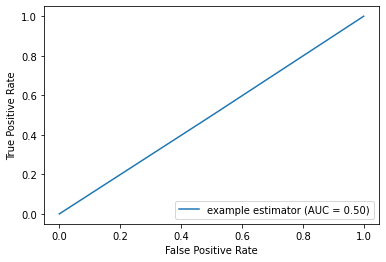

fpr: [0.         0.50166667 1.        ]
tpr: [0.         0.49833333 1.        ]
p_G_evaluated
[2.15646260e-07 1.20541533e-03 1.19201803e-06 ... 1.81575522e-17
 9.13298741e-21 1.95844941e-07]
p_R_evaluated
[4.05523590e-07 8.62113134e-06 8.37373319e-07 ... 5.98606583e-08
 3.47357699e-09 1.23524806e-06]
test1
Synth_set
            0         1         2         3         4         5         6  \
0    0.808338  0.185537 -1.055322  0.072831  0.892915 -1.555340  1.803741   
1    0.810161  0.185650 -1.057372  1.463671  0.015448  0.110952 -0.693613   
2    0.809228  0.185208  0.858597 -0.924022  0.014512  0.111798  0.140738   
3    0.809765  0.185849 -1.056999  2.210897  0.902466  1.781480  1.809601   
4    0.808903 -1.074851  0.858121 -0.253068 -0.876378 -0.722184 -0.699097   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.807997  0.186349  0.860549 -1.062537  0.015668  0.112952  0.138076   
496  0.808649  0.186052  0.855928 -0.527670  1.793480  1.781488  1

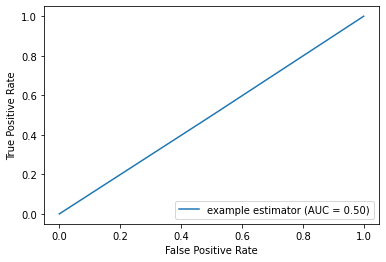

fpr: [0.         0.50166667 1.        ]
tpr: [0.         0.49833333 1.        ]
p_G_evaluated
[2.82541157e-08 1.81458747e-04 1.27884184e-07 ... 9.98715755e-12
 3.24115850e-17 7.47859998e-07]
p_R_evaluated
[4.05523590e-07 8.62113134e-06 8.37373319e-07 ... 5.98606583e-08
 3.47357699e-09 1.23524806e-06]
test1
Synth_set
            0         1         2         3         4         5         6  \
0    0.808660 -1.079457 -1.055480  0.720006 -1.756394 -1.558015 -1.532192   
1    0.810161  0.184990  0.858353 -1.118946  0.015761  0.110902  0.140140   
2    0.808914 -1.079457  0.858729 -0.968180  0.902860  1.780857  0.140376   
3    0.809671 -1.079457  0.858775 -0.401881  0.014392 -0.721481  0.138857   
4    0.808129 -1.075434  0.858439 -0.963594  0.014264  0.111401  0.137488   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.807442  0.185987 -1.053200  0.429292  0.908402  1.788515  1.805762   
496  0.808503  0.185400  0.856784 -1.139672  0.015269  0.112649  0

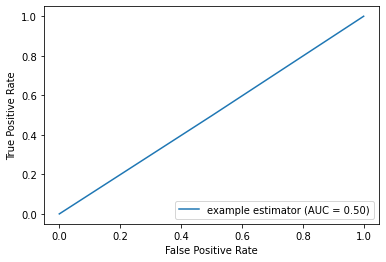

fpr: [0.    0.502 1.   ]
tpr: [0.    0.498 1.   ]
1
SEX
(30000, 23)
             0         1         2         3         4         5         6   \
0     -0.982572 -1.079457  0.858557 -0.595102  0.014861  0.111736  0.138865   
1     -0.520128  1.451114 -1.057295  0.381275 -0.874991 -0.723570  0.138865   
2     -0.674276 -1.079457 -1.057295 -0.812074 -0.874991  1.782348 -0.696663   
3      1.175499 -1.079457 -1.057295  1.574625 -1.764843 -1.558876 -1.532192   
4     -1.059646  0.185828 -1.057295 -0.486615 -0.874991  1.782348  1.809921   
...         ...       ...       ...       ...       ...       ...       ...   
29995  0.250611  0.185828 -1.057295  0.272789  0.014861  0.111736  0.138865   
29996  0.250611 -1.079457  0.858557  0.381275 -0.874991 -0.723570  0.138865   
29997  0.327685  0.185828 -1.057295  0.815221  0.014861  0.111736  0.138865   
29998 -0.134759 -1.079457 -1.057295  0.164303  0.014861  0.111736  0.138865   
29999 -1.136720  1.451114  0.858557 -0.703588  0.014861  0.1117

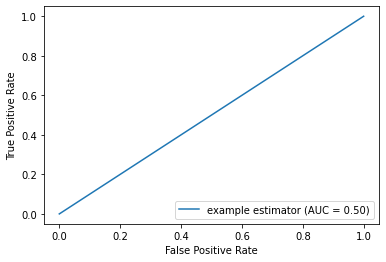

fpr: [0.  0.5 1. ]
tpr: [0.  0.5 1. ]
p_G_evaluated
[1.34614140e-06 1.56209648e-05 4.97429513e-09 ... 3.26647920e-09
 2.88092166e-09 2.01523727e-03]
p_R_evaluated
[2.59863800e-06 2.11898032e-06 5.41220383e-08 ... 2.24595238e-08
 3.26193466e-08 4.22922616e-05]
test1
Synth_set
            0         1         2         3         4         5         6  \
0   -1.082222 -1.080503  0.859451 -1.086492  0.016124  0.111855  0.138369   
1    0.524519 -1.080229  0.857342 -0.597033 -0.871969 -0.723771 -0.693827   
2   -1.040053  0.185377  0.858089 -0.441686  0.015019  0.111828  0.140790   
3   -0.951679  0.186221 -1.057412  2.091032  0.015093  0.112653  0.139638   
4    1.336198  0.187300  0.858332 -0.214832  0.014158  0.112242  0.137754   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.600550  0.186132 -1.054130 -0.997034  0.015657  0.113024  0.137714   
496 -1.045637  0.185315  0.856391 -0.583360  0.015424  0.111459  0.139549   
497 -0.979794  0.187375  0.8610

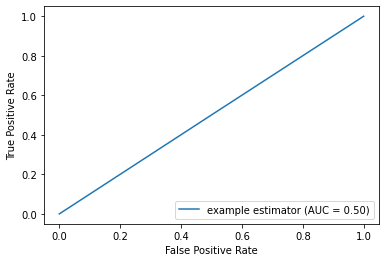

fpr: [0.         0.49966667 1.        ]
tpr: [0.         0.50033333 1.        ]
p_G_evaluated
[1.48667802e-08 3.27758536e-07 1.54164065e-12 ... 5.13624239e-10
 4.47911563e-10 1.28755431e-04]
p_R_evaluated
[2.59863800e-06 2.11898032e-06 5.41220383e-08 ... 2.24595238e-08
 3.26193466e-08 4.22922616e-05]
test1
Synth_set
            0         1         2         3         4         5         6  \
0   -1.128452  0.184761  0.859734  0.534679  0.016189  0.112156  0.138640   
1    2.473362  0.185246 -1.057102  1.679416  0.016082  0.111173  0.139589   
2   -1.066517  0.185247 -1.056587  2.167887  0.014761  0.111642  0.140466   
3   -0.923133 -1.079389  0.858902 -0.139626  0.014003  0.111793 -0.695449   
4   -0.827897  0.188082  0.858686 -0.200421 -0.875070  1.781624  1.802423   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.944246 -1.078854  0.861478 -1.174409  0.015601  0.112652  0.137871   
496 -1.202648  0.185715  0.857849 -1.059750  0.015481  0.112089  0

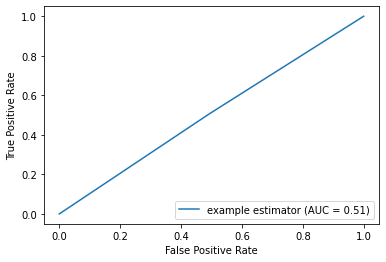

fpr: [0.         0.49333333 1.        ]
tpr: [0.         0.50666667 1.        ]
p_G_evaluated
[7.45964762e-07 2.08129968e-06 2.30546882e-07 ... 1.91671244e-08
 1.08721556e-09 5.06788949e-03]
p_R_evaluated
[2.59863800e-06 2.11898032e-06 5.41220383e-08 ... 2.24595238e-08
 3.26193466e-08 4.22922616e-05]
test1
Synth_set
            0         1         2         3         4         5         6  \
0   -1.137486  0.184506  0.858826 -0.412210  3.176280  2.607382  2.605286   
1   -0.844127  0.184665 -1.057110 -0.530364 -0.872791 -0.724603 -0.694191   
2   -1.103261  0.184887 -1.056989  2.217628 -0.874825 -0.724305 -0.692709   
3   -1.001720  0.184932  0.858549 -0.272694  0.014312  0.111885  0.139266   
4   -1.184251  0.188255  0.858319 -0.911597  0.013866  0.111358  0.137363   
..        ...       ...       ...       ...       ...       ...       ...   
495  1.239635 -1.078411 -1.053179 -1.013313 -1.760729 -1.554924 -0.698794   
496  0.850605 -1.079202 -1.058551 -0.586854  0.014147  0.111496  0

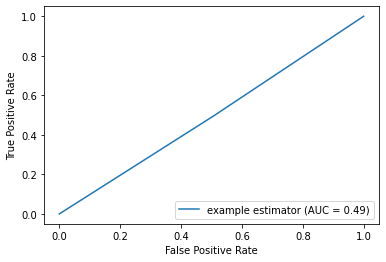

fpr: [0.         0.50566667 1.        ]
tpr: [0.         0.49433333 1.        ]
p_G_evaluated
[1.66843210e-07 1.46654610e-06 4.76822766e-14 ... 4.40479614e-09
 7.30380900e-10 1.82509963e-04]
p_R_evaluated
[2.59863800e-06 2.11898032e-06 5.41220383e-08 ... 2.24595238e-08
 3.26193466e-08 4.22922616e-05]
test1
Synth_set
            0         1         2         3         4         5         6  \
0   -1.129235  0.184666 -1.054730  1.717400  0.016549  0.112140  0.138378   
1   -0.900249  0.185018 -1.056983  1.400177  0.016271  0.111391  0.140289   
2   -1.040724  0.184695 -1.056795  1.855550  0.014892  0.111807  0.140398   
3   -0.967376  0.185543  0.857280  2.008453  0.897942  1.783557  0.139073   
4   -0.246106 -1.075387  0.858427 -0.211104 -1.764843 -1.556494 -1.532192   
..        ...       ...       ...       ...       ...       ...       ...   
495  1.311174 -1.078843  0.860827 -1.129046 -1.759409 -1.553798 -1.532192   
496 -0.210755 -1.079811  0.856599 -0.553586 -1.761375 -1.556476 -1

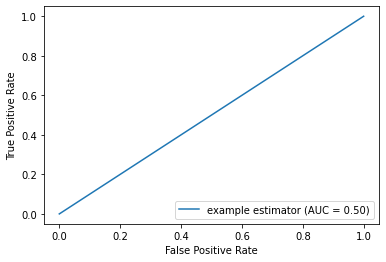

fpr: [0.  0.5 1. ]
tpr: [0.  0.5 1. ]
2
EDUCATION
(30000, 23)
             0         1         2         3         4         5         6   \
0     -0.365981  0.810161 -1.057295  0.164303  0.014861  0.111736  0.138865   
1      0.096463  0.810161 -1.057295 -0.378129  0.904712 -1.558876 -1.532192   
2      2.562830 -1.234323  0.858557 -0.161156  0.014861  0.111736  0.138865   
3      0.481833 -1.234323  0.858557 -0.812074 -0.874991 -0.723570 -0.696663   
4     -1.059646  0.810161  0.858557 -1.462993  0.014861  0.111736  0.138865   
...         ...       ...       ...       ...       ...       ...       ...   
29995 -0.443054  0.810161  0.858557 -0.703588  0.904712  1.782348  1.809921   
29996 -0.905498  0.810161  0.858557 -1.246020  3.574267  2.617654  1.809921   
29997  0.481833  0.810161  0.858557 -0.703588 -1.764843 -1.558876 -0.696663   
29998  1.869164 -1.234323  0.858557  1.357652  0.014861  0.111736  0.138865   
29999  0.327685 -1.234323  2.774410 -0.920561  0.014861  0.111736  0.

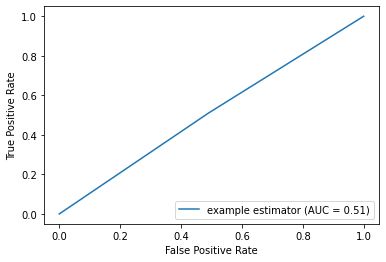

fpr: [0.   0.49 1.  ]
tpr: [0.   0.51 1.  ]
p_G_evaluated
[1.04817904e-07 2.07912852e-08 2.07319957e-08 ... 2.32755667e-07
 1.45000234e-05 1.75967177e-03]
p_R_evaluated
[5.47966583e-06 2.41015811e-06 7.97064181e-07 ... 2.61090799e-06
 8.82055591e-08 3.90616028e-05]
test1
Synth_set
            0         1         2         3         4         5         6  \
0   -1.199345  0.808734  0.864074 -0.933929 -0.871780 -0.721656 -0.696486   
1   -0.919267 -1.234323 -1.062196 -0.968132  0.905927  1.779745  1.813080   
2    1.155083  0.808562  0.857737 -0.767107 -1.753724 -1.554064 -1.522380   
3   -1.101786 -1.233887  0.859052 -0.715755  0.902406  2.694991  1.809055   
4    1.286763 -1.229774  0.856005  1.852011 -1.764542 -1.553910 -1.532192   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.142971  0.809963  0.872108 -0.990405  0.015494  0.113470  0.137815   
496  1.280486 -1.233875 -1.069343  2.098212  0.014267  0.113037  0.139395   
497 -0.419257  0.810161 -

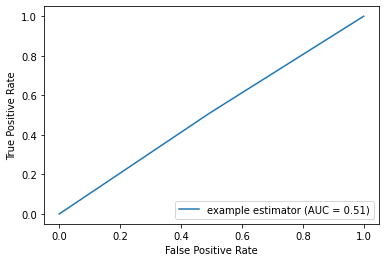

fpr: [0.    0.492 1.   ]
tpr: [0.    0.508 1.   ]
p_G_evaluated
[1.64834394e-07 3.32203482e-05 1.49901233e-07 ... 7.38808060e-06
 3.52156853e-04 9.00471858e-04]
p_R_evaluated
[5.47966583e-06 2.41015811e-06 7.97064181e-07 ... 2.61090799e-06
 8.82055591e-08 3.90616028e-05]
test1
Synth_set
            0         1         2         3         4         5         6  \
0    1.297289  0.808379  0.859293 -0.267372  0.016205  0.111652  0.138842   
1   -0.898266  0.808257 -1.057246  1.090520  1.795411  0.111333  0.140847   
2    0.088801  0.808265 -1.060640  1.838150  0.015030  0.110829  0.139304   
3   -1.031476  0.809278  0.859195 -0.865066  0.014300 -0.721360  0.139578   
4   -0.757420 -1.230416 -1.057273  1.109792  1.782187  1.781481  1.806063   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.311662  0.810161  0.861606 -0.971523  0.014941  0.112607  0.138357   
496  1.332392  0.809455  0.856597 -0.513378 -0.874377 -0.722238 -0.693644   
497  0.233322  0.81

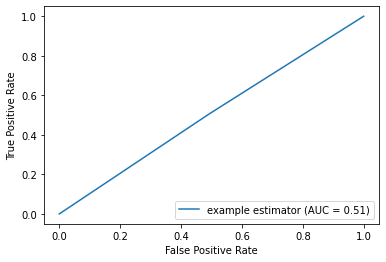

fpr: [0.         0.49333333 1.        ]
tpr: [0.         0.50666667 1.        ]
p_G_evaluated
[6.58751727e-06 7.24238643e-05 1.01706009e-08 ... 8.45552111e-06
 4.80577058e-05 6.20102661e-03]
p_R_evaluated
[5.47966583e-06 2.41015811e-06 7.97064181e-07 ... 2.61090799e-06
 8.82055591e-08 3.90616028e-05]
test1
Synth_set
            0         1         2         3         4         5         6  \
0    0.004168  0.808770  0.861524 -0.810216  0.015335  0.111766  0.138352   
1    2.426813  0.809449 -1.057253  1.023898  0.014651 -0.722978  0.138984   
2    0.100604  0.809060  0.857408 -0.278882  0.014305  0.111551  0.140240   
3    1.827852  0.809301  0.860114 -0.684252 -0.876771 -0.721694 -0.696377   
4   -1.143994  0.810161  0.851384 -0.703062  0.909040  1.779144  2.570688   
..        ...       ...       ...       ...       ...       ...       ...   
495 -1.213794 -1.233171  0.865907 -1.477658  0.904624  1.781345  1.802966   
496 -1.167211 -1.233422 -1.072395 -1.071173  0.013557  0.111110  0

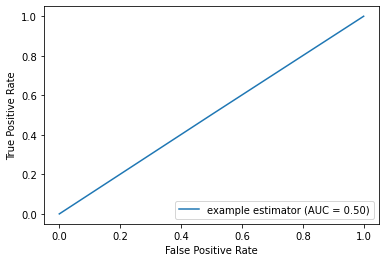

fpr: [0.    0.499 1.   ]
tpr: [0.    0.501 1.   ]
p_G_evaluated
[1.75179729e-07 4.98120460e-03 3.62619308e-07 ... 8.66882809e-08
 3.02757159e-04 1.06380831e-02]
p_R_evaluated
[5.47966583e-06 2.41015811e-06 7.97064181e-07 ... 2.61090799e-06
 8.82055591e-08 3.90616028e-05]
test1
Synth_set
            0         1         2         3         4         5         6  \
0   -1.102000  0.808633 -1.051229 -0.777630  0.016153  0.111765  0.139059   
1   -0.297698  0.809139  0.854572 -0.981409  0.016211  0.111201  0.140371   
2   -1.066339  0.809102 -1.056757 -0.651087  0.014717  0.111716  0.140616   
3    0.069555  0.808959 -1.059414  1.742857  0.904998  1.781784 -1.524547   
4   -1.015246 -1.229632  0.856851 -0.701101 -0.876090 -0.722412  0.137540   
..        ...       ...       ...       ...       ...       ...       ...   
495 -1.213794  0.810051  0.871619 -1.380669  0.015797  0.113006  0.138341   
496 -1.124980  0.809720 -1.070628 -0.974414  1.793318  1.780934  1.813163   
497  0.166835  0.81

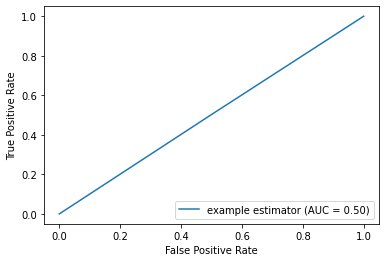

fpr: [0.         0.49866667 1.        ]
tpr: [0.         0.50133333 1.        ]
3
MARRIAGE
(30000, 23)
             0         1         2         3         4         5         6   \
0      0.250611 -1.234323 -1.079457  0.055816  0.904712  1.782348  0.138865   
1      0.250611  0.810161  0.185828 -0.812074  0.904712 -0.723570 -0.696663   
2     -0.905498 -1.234323  1.451114  1.574625  1.794564  0.111736  0.138865   
3      0.250611  0.810161  0.185828 -0.161156  0.014861  0.111736  0.138865   
4     -0.751350  0.810161 -1.079457 -1.246020  0.014861  0.111736  0.138865   
...         ...       ...       ...       ...       ...       ...       ...   
29995 -1.059646  0.810161  0.185828 -1.462993  0.014861  0.111736  0.138865   
29996 -1.059646  0.810161 -1.079457 -0.920561  1.794564  1.782348  1.809921   
29997  1.021351  0.810161  1.451114 -0.703588 -1.764843 -1.558876 -1.532192   
29998 -0.211833 -1.234323  0.185828  0.489762  0.014861  0.111736  0.138865   
29999 -0.520128  0.810161  1

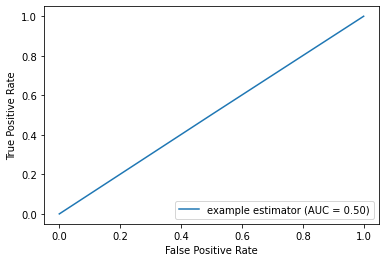

fpr: [0.    0.499 1.   ]
tpr: [0.    0.501 1.   ]
p_G_evaluated
[3.11391285e-10 5.89192478e-05 7.04857332e-10 ... 2.76586167e-04
 2.42199888e-04 4.19332749e-18]
p_R_evaluated
[4.74363348e-06 1.58100932e-05 8.31838248e-06 ... 1.30398219e-04
 5.44030518e-05 6.47744278e-08]
test1
Synth_set
            0         1         2         3         4         5         6  \
0   -1.154884  0.808457  0.186482 -0.922957  0.016248  0.111584  0.138382   
1    0.517371  0.808955  0.185242 -0.319998  0.016114  0.111060  0.139929   
2    1.882169  0.808966 -1.079568  1.908974  0.899355 -1.558876 -0.694291   
3    1.172150  0.809247 -1.078791  0.088429 -1.764843 -0.722868 -1.530596   
4   -1.213794  0.810161  0.186110 -0.775865  1.787085  1.770983  1.802088   
..        ...       ...       ...       ...       ...       ...       ...   
495  1.551376  0.810008 -1.075579 -0.060239 -1.760246 -1.553860 -0.699304   
496  0.709208  0.809330 -1.081222 -0.281963 -1.762536 -0.722355 -1.529574   
497 -1.054315  0.81

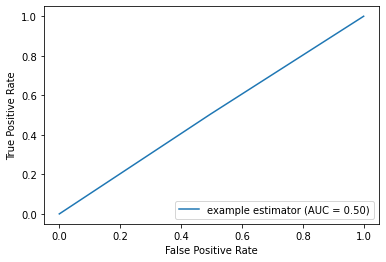

fpr: [0.    0.496 1.   ]
tpr: [0.    0.504 1.   ]
p_G_evaluated
[4.08245231e-09 2.96342655e-05 9.93724352e-05 ... 3.36816249e-04
 2.88692802e-04 1.48596824e-16]
p_R_evaluated
[4.74363348e-06 1.58100932e-05 8.31838248e-06 ... 1.30398219e-04
 5.44030518e-05 6.47744278e-08]
test1
Synth_set
            0         1         2         3         4         5         6  \
0   -1.141091  0.808371  0.186621 -0.950017  0.016042  0.111939  0.138366   
1   -0.936711  0.808719  0.185525 -1.186773  0.015635  0.111141  0.139796   
2   -1.115180  0.808535  0.185836 -0.810339  1.790877  1.780381  1.814108   
3    0.286335  0.809317 -1.078748  0.065668 -0.875355 -0.721638 -0.696380   
4    0.085230  0.810161  0.185430 -0.114000  0.014322  0.112343  0.137456   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.485573  0.810161 -1.078059 -0.789045 -1.760790 -0.722067 -0.698067   
496  0.068914  0.809220 -1.081085  1.165946  0.903838 -1.554687 -1.528751   
497  2.089813  0.81

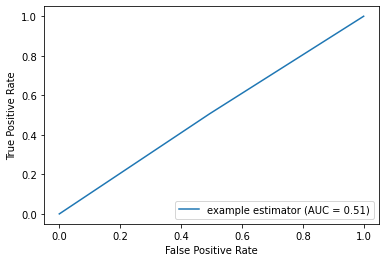

fpr: [0.         0.49366667 1.        ]
tpr: [0.         0.50633333 1.        ]
p_G_evaluated
[7.45629276e-09 2.51443083e-05 3.02082833e-11 ... 4.39188487e-06
 2.28873569e-04 3.82728497e-15]
p_R_evaluated
[4.74363348e-06 1.58100932e-05 8.31838248e-06 ... 1.30398219e-04
 5.44030518e-05 6.47744278e-08]
test1
Synth_set
            0         1         2         3         4         5         6  \
0    1.987599 -1.234323  0.186860  1.593497 -1.756864  0.111435  0.138310   
1   -0.820308  0.808693  0.185340 -0.566885  0.016415  0.111113  0.140157   
2   -0.531339  0.808705  0.185505 -0.810806  0.900102  1.782355  1.814456   
3   -0.966410  0.809291  0.185541 -0.819657  0.014775  0.112338  0.139111   
4    1.953098  0.810161 -1.078999  1.787288  0.014730  0.111976  0.137551   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.462072  0.810161 -1.075432 -0.239481 -1.761440 -1.555602 -1.532192   
496  0.334993  0.810161 -1.082937 -0.840371 -0.873994 -0.723590 -1

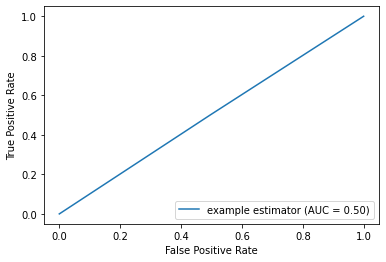

fpr: [0.         0.49766667 1.        ]
tpr: [0.         0.50233333 1.        ]
p_G_evaluated
[1.93999092e-10 1.46322134e-03 4.43795036e-09 ... 2.17694450e-05
 5.80442722e-04 1.14624225e-08]
p_R_evaluated
[4.74363348e-06 1.58100932e-05 8.31838248e-06 ... 1.30398219e-04
 5.44030518e-05 6.47744278e-08]
test1
Synth_set
            0         1         2         3         4         5         6  \
0   -0.788554  0.808278  0.186541 -0.896256  0.015643  0.111706  0.138096   
1    0.533331  0.808877 -1.079751 -1.040539 -0.873112 -0.724595 -0.695084   
2   -0.346660  0.808300  0.186123 -0.274745  0.014466  0.111762  0.139482   
3   -0.371901  0.808849  0.185914 -0.242650  0.014480  0.112189  0.138455   
4    1.920085  0.810161 -1.079479  0.027614 -0.878527 -0.723194 -0.701142   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.151014  0.809626  0.187360 -1.320355  0.905065  1.783428  1.801466   
496 -1.100940  0.809293  0.184301 -1.047678 -0.873868 -0.721577 -0

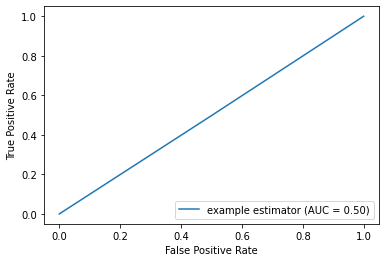

fpr: [0.         0.50133333 1.        ]
tpr: [0.         0.49866667 1.        ]
4
AGE
(30000, 23)
             0         1         2         3         4         5         6   \
0      1.483795  0.810161  1.451114 -1.057295  0.904712 -0.723570 -0.696663   
1     -0.597202  0.810161  1.451114 -1.057295 -0.874991 -0.723570 -0.696663   
2     -0.520128  0.810161  1.451114  0.858557  1.794564  0.111736  0.138865   
3     -0.905498 -1.234323  0.185828  0.858557  0.014861  0.111736  0.138865   
4     -0.057685  0.810161  0.185828  0.858557 -0.874991 -0.723570 -0.696663   
...         ...       ...       ...       ...       ...       ...       ...   
29995  0.250611 -1.234323 -1.079457  0.858557  0.014861  0.111736  0.138865   
29996 -1.136720  0.810161 -1.079457 -1.057295  0.904712  2.617654  1.809921   
29997 -1.059646  0.810161  1.451114  2.774410  1.794564  1.782348  0.138865   
29998 -0.520128  0.810161 -1.079457  0.858557  1.794564  1.782348  1.809921   
29999 -0.674276  0.810161 -1.0794

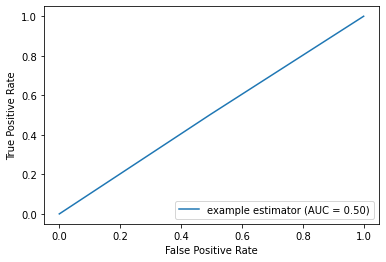

fpr: [0.         0.49666667 1.        ]
tpr: [0.         0.50333333 1.        ]
p_G_evaluated
[9.32326403e-12 1.89974908e-07 5.87702580e-06 ... 1.20551346e-05
 3.37540573e-02 1.17279195e-03]
p_R_evaluated
[1.89603540e-07 5.14645763e-05 1.03068351e-06 ... 1.11476075e-05
 1.73202774e-04 3.57707926e-05]
test1
Synth_set
            0         1         2         3         4         5         6  \
0   -1.062478  0.807915  0.186078  0.859567  0.015290  0.112132  0.138880   
1    0.527253  0.808376 -1.079248 -1.056168  0.904992 -1.558876 -0.694962   
2   -1.078718  0.808277  0.185674  0.859797  0.013645  0.112380  0.140619   
3   -0.989549  0.809059 -1.078172  0.859704  0.902393  1.778964  1.807998   
4   -0.747969  0.810161  0.185261 -1.054122  1.780841  0.112484  0.137768   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.411372  0.809538  0.187872  0.856560  0.015608  0.113145  0.138387   
496  0.216986  0.808819 -1.081904 -1.056316 -1.762937 -1.558460 -1

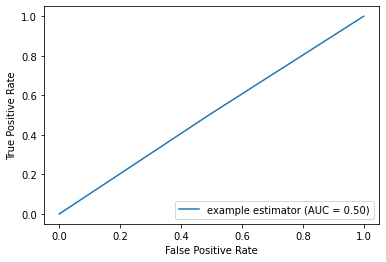

fpr: [0.         0.49566667 1.        ]
tpr: [0.         0.50433333 1.        ]
p_G_evaluated
[2.45082847e-15 3.17737888e-07 2.53207240e-07 ... 8.83614647e-06
 9.33237067e-03 7.89148453e-04]
p_R_evaluated
[1.89603540e-07 5.14645763e-05 1.03068351e-06 ... 1.11476075e-05
 1.73202774e-04 3.57707926e-05]
test1
Synth_set
            0         1         2         3         4         5         6  \
0   -1.089180  0.808530 -1.077589  0.858942  0.906993 -1.555536 -1.531071   
1    0.573108  0.809207 -1.075322  0.858957 -1.754513 -0.724599 -0.694307   
2   -1.182637  0.809157  0.187679  0.858812  0.903220  1.780476  1.814130   
3   -0.904106  0.809390 -1.078297  0.859058 -1.761937 -1.553812 -1.529908   
4   -1.213794  0.810161  0.186237 -1.066654  1.799253  1.786825  1.803344   
..        ...       ...       ...       ...       ...       ...       ...   
495 -1.065342  0.809952  0.187683  0.856252  1.795179  1.783938  0.138355   
496 -1.073960  0.809569  0.184296  0.858134  0.015363  0.112361  0

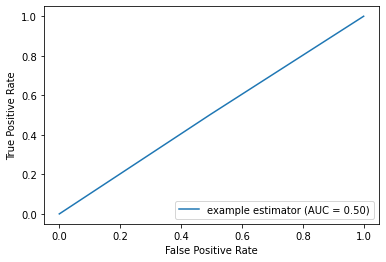

fpr: [0.         0.49666667 1.        ]
tpr: [0.         0.50333333 1.        ]
p_G_evaluated
[2.63118975e-10 9.81504922e-08 7.14021697e-06 ... 4.01058621e-06
 5.90429349e-03 7.16937035e-04]
p_R_evaluated
[1.89603540e-07 5.14645763e-05 1.03068351e-06 ... 1.11476075e-05
 1.73202774e-04 3.57707926e-05]
test1
Synth_set
            0         1         2         3         4         5         6  \
0   -1.179832  0.808317  4.093817  0.859406  0.016327  0.111697  0.138766   
1   -0.173344  0.808662  0.185687  0.858106  0.906567  0.111186  0.140438   
2    1.707467 -1.233494  3.947313 -1.055103  0.014955  0.112137  0.140268   
3   -1.016813  0.809299  0.185683  0.859265  0.907063  1.779959  1.811249   
4   -1.132785 -1.230036  0.186305  0.859727  0.014327  0.111955  0.137878   
..        ...       ...       ...       ...       ...       ...       ...   
495 -1.213794  0.809938  0.188858  0.856339  0.016088  0.112717  0.138078   
496 -0.885439  0.809492  0.184920  0.858116  0.015662  0.112539  0

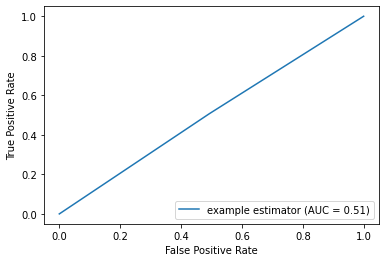

fpr: [0.    0.493 1.   ]
tpr: [0.    0.507 1.   ]
p_G_evaluated
[2.10906286e-10 3.16842480e-07 2.95238006e-07 ... 7.04525844e-06
 3.00250207e-03 2.61507525e-04]
p_R_evaluated
[1.89603540e-07 5.14645763e-05 1.03068351e-06 ... 1.11476075e-05
 1.73202774e-04 3.57707926e-05]
test1
Synth_set
            0         1         2         3         4         5         6  \
0    0.094255  0.808411  0.186438  0.858788  0.015283  0.112114  0.138412   
1    0.439505  0.808902 -1.078574  0.857584 -1.758717 -1.558876 -1.527951   
2   -0.010105  0.808796  0.190087  0.859466  0.014171  0.112612  0.140002   
3   -1.010627  0.809324 -1.077966  0.859607 -0.875089  0.112728  0.139103   
4   -1.168924  0.810161  0.185433 -1.054578  1.784851  1.781065  1.801089   
..        ...       ...       ...       ...       ...       ...       ...   
495 -1.213794  0.810161  0.189327 -1.058578 -0.871088 -0.721676 -0.697703   
496  1.446044  0.809456 -1.082444 -1.056768  0.014113  0.112897  0.139357   
497 -0.960465  0.81

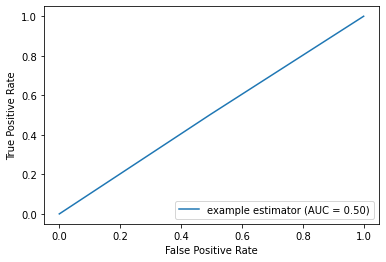

fpr: [0.         0.49666667 1.        ]
tpr: [0.         0.50333333 1.        ]
5
PAY_0
(30000, 23)
             0         1         2         3         4         5         6   \
0     -1.136720 -1.234323  1.451114  0.858557 -1.354506  0.111736  0.138865   
1     -0.134759 -1.234323  0.185828 -1.057295  0.489762  0.111736  0.138865   
2      0.096463 -1.234323 -1.079457  0.858557 -0.052670 -0.723570 -0.696663   
3      0.867203 -1.234323 -1.079457  0.858557 -0.595102  1.782348  1.809921   
4      0.250611 -1.234323  1.451114 -1.057295  3.201920  0.111736  0.138865   
...         ...       ...       ...       ...       ...       ...       ...   
29995 -1.059646 -1.234323  0.185828  0.858557  2.659488  0.111736  0.138865   
29996  2.408682  0.810161  1.451114 -1.057295  0.055816  0.111736  0.138865   
29997 -0.134759  0.810161  0.185828 -1.057295  1.032193 -0.723570 -0.696663   
29998  0.096463  0.810161  0.185828  0.858557 -0.378129 -1.558876 -1.532192   
29999  1.483795  0.810161  0.18

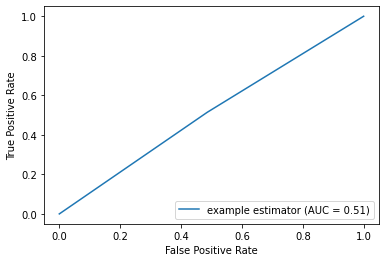

fpr: [0.    0.486 1.   ]
tpr: [0.    0.514 1.   ]
p_G_evaluated
[1.89671663e-06 3.57896978e-09 3.68203416e-07 ... 2.32926524e-06
 4.01748500e-08 4.95046121e-06]
p_R_evaluated
[2.35531281e-05 2.49550264e-10 3.53980944e-06 ... 1.03813551e-06
 9.38871968e-08 1.46812850e-05]
test1
Synth_set
            0         1         2         3         4         5         6  \
0    2.214923  0.808441 -1.076078 -1.055321  2.486405 -1.557670 -1.531913   
1   -0.903329  0.808748  0.186256 -1.055840  2.112407 -0.724196 -0.692870   
2   -1.098746  0.808781 -1.077452  0.860702 -1.231598  0.111669  0.140608   
3    1.295390  0.809183 -1.080713  0.860525 -0.865547 -1.556497 -1.531670   
4    0.938445  0.810161  0.186166 -1.055693  1.786424 -0.722837  1.798834   
..        ...       ...       ...       ...       ...       ...       ...   
495 -1.213794  0.810113  0.188458  0.857696 -1.056023  0.113302  0.138145   
496 -1.126089 -1.233874  1.448391 -1.055486  1.747632  0.112474  0.140105   
497 -1.039120  0.81

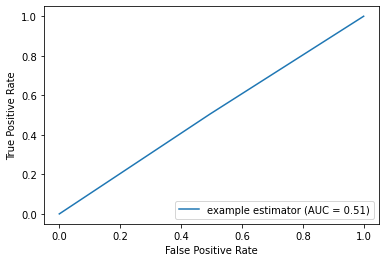

fpr: [0.    0.495 1.   ]
tpr: [0.    0.505 1.   ]
p_G_evaluated
[3.60313086e-05 9.72866382e-11 4.11249047e-13 ... 6.79888675e-06
 7.92739915e-11 2.16165492e-05]
p_R_evaluated
[2.35531281e-05 2.49550264e-10 3.53980944e-06 ... 1.03813551e-06
 9.38871968e-08 1.46812850e-05]
test1
Synth_set
            0         1         2         3         4         5         6  \
0   -0.798138  0.808709  0.186852 -1.055592  0.713236  0.112284  0.139027   
1    2.525996  0.808843  4.077989  0.859170 -0.946991  0.111208  0.140555   
2   -1.109483  0.809124  0.185737  0.860224 -1.283882 -0.723110 -0.692816   
3    0.031047  0.809683  0.186128 -1.055221  1.473920  0.112680  0.139715   
4   -1.137919  0.810161  0.186072 -1.054299  0.744507  0.112199  0.137675   
..        ...       ...       ...       ...       ...       ...       ...   
495 -1.213794  0.810113 -1.075056  0.857556 -1.087105  0.113211  0.138545   
496 -0.713464  0.809524  0.184672 -1.056856  0.416421 -0.721654 -0.694076   
497 -0.570682  0.81

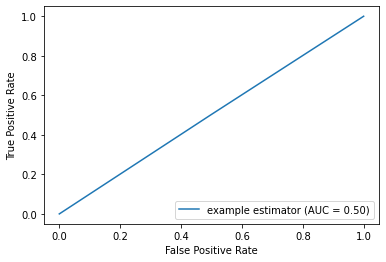

fpr: [0.         0.49833333 1.        ]
tpr: [0.         0.50166667 1.        ]
p_G_evaluated
[7.37436658e-05 1.77501980e-09 9.92231945e-12 ... 1.62291302e-05
 4.36691737e-14 1.07907368e-04]
p_R_evaluated
[2.35531281e-05 2.49550264e-10 3.53980944e-06 ... 1.03813551e-06
 9.38871968e-08 1.46812850e-05]
test1
Synth_set
            0         1         2         3         4         5         6  \
0   -0.717955 -1.234323 -1.077449  0.860465 -0.951089  1.781072  1.808948   
1   -0.914036  0.808985  0.185393 -1.056996  2.214935  0.111298  0.139989   
2   -0.206517  0.809014 -1.080078  0.859715 -1.272027 -0.723052 -0.693676   
3   -1.040252  0.809417  1.448233 -1.056140  1.642178  1.782483  1.809296   
4    0.978126  0.810161 -1.079414  0.860762 -0.999085  0.111844  0.137374   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.531288  0.810161 -1.077567  0.857400 -1.076628 -0.721490 -0.698490   
496 -1.180110 -1.234213  1.452720 -1.057236  1.735267  1.782833  1

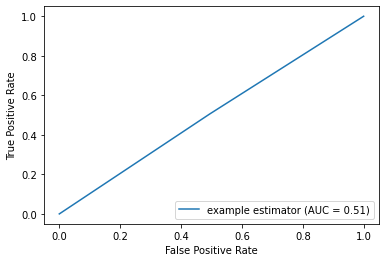

fpr: [0.         0.49433333 1.        ]
tpr: [0.         0.50566667 1.        ]
p_G_evaluated
[1.35267038e-09 1.74545455e-09 3.60038602e-09 ... 4.91839263e-06
 6.36279627e-11 1.73701076e-05]
p_R_evaluated
[2.35531281e-05 2.49550264e-10 3.53980944e-06 ... 1.03813551e-06
 9.38871968e-08 1.46812850e-05]
test1
Synth_set
            0         1         2         3         4         5         6  \
0   -1.142772  0.808791  0.186585 -1.054991  2.257019  0.112406  0.138791   
1   -0.308725  0.808914  0.184800 -1.056018  0.538550  1.779628  1.813482   
2   -0.635278  0.808932 -1.079456  0.860006 -0.843710  0.111939  0.140563   
3    1.347120  0.809531  0.186315  0.860064 -0.749013  0.112514  0.139533   
4   -1.136725  0.810161  0.185869 -1.054562  1.026517  1.786961  1.807302   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.300711  0.810161 -1.073415  0.856972 -0.442252  0.113109  0.138196   
496 -1.142296  0.809621  0.182777 -1.056408  1.790093  0.112669  0

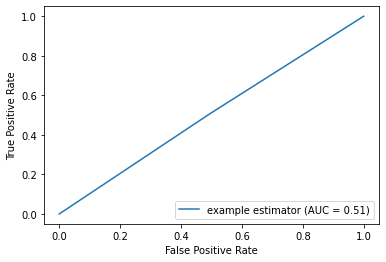

fpr: [0.    0.494 1.   ]
tpr: [0.    0.506 1.   ]
6
PAY_2
(30000, 23)
             0         1         2         3         4         5         6   \
0     -0.905498 -1.234323  0.185828 -1.057295  1.466139  1.794564  0.138865   
1      2.177460  0.810161 -1.079457  0.858557 -0.486615 -0.874991 -0.696663   
2      1.252573 -1.234323 -1.079457  0.858557 -0.269643  0.014861  0.138865   
3     -1.059646  0.810161  0.185828  0.858557 -1.246020 -0.874991 -0.696663   
4      2.408682  0.810161 -1.079457 -1.057295  0.381275  0.014861  0.138865   
...         ...       ...       ...       ...       ...       ...       ...   
29995 -1.213794 -1.234323  0.185828  0.858557 -0.920561  0.014861  0.138865   
29996 -0.211833  0.810161  0.185828  0.858557  0.164303  0.014861 -0.696663   
29997  0.635981  0.810161 -1.079457  0.858557  0.055816  0.014861  0.138865   
29998  0.404759 -1.234323 -1.079457  0.858557 -0.269643  0.014861  0.138865   
29999 -0.057685  0.810161  1.451114 -1.057295  1.466139 -1.76

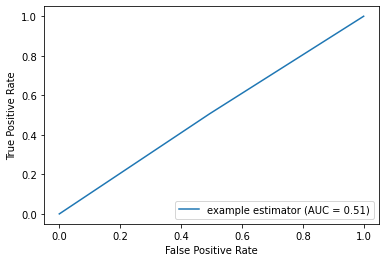

fpr: [0.         0.49366667 1.        ]
tpr: [0.         0.50633333 1.        ]
p_G_evaluated
[1.22360141e-06 1.36184448e-17 3.90825433e-08 ... 3.15175924e-08
 5.71506653e-08 9.44422827e-05]
p_R_evaluated
[2.02556941e-06 8.68689520e-12 2.86465106e-08 ... 1.93550352e-05
 5.90459511e-07 1.85995156e-04]
test1
Synth_set
            0         1         2         3         4         5         6  \
0   -1.107551  0.809663  0.185937 -1.056340  2.204409  0.015121  0.138629   
1    2.552437 -1.234323 -1.079438 -1.056913  2.120833  0.014511  0.139943   
2    1.111101  0.809297 -1.079457  0.859074 -0.642753  0.014848  0.140457   
3    0.329200  0.809603  0.185849 -1.055529 -0.680356  0.015809  0.139413   
4   -1.170492  0.810161  0.185611 -1.055091  0.792564  0.906014  1.804423   
..        ...       ...       ...       ...       ...       ...       ...   
495 -1.030780  0.810161 -1.076799  0.857233 -1.120862  0.016267  0.138667   
496 -1.179289 -1.233682  0.185523  0.858647 -1.237001  0.016317  0

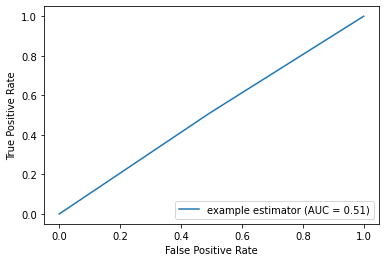

fpr: [0.    0.492 1.   ]
tpr: [0.    0.508 1.   ]
p_G_evaluated
[7.07561186e-07 1.10002617e-36 2.88946679e-08 ... 4.32028160e-10
 5.05738764e-07 1.10747392e-03]
p_R_evaluated
[2.02556941e-06 8.68689520e-12 2.86465106e-08 ... 1.93550352e-05
 5.90459511e-07 1.85995156e-04]
test1
Synth_set
            0         1         2         3         4         5         6  \
0    0.681744  0.808624  0.186974 -1.054979 -0.253093 -0.875440 -0.698097   
1   -0.782994  0.808595  0.185791  0.859522 -0.953558  0.013932  0.139765   
2   -1.012708  0.808909  0.186489 -1.055231  1.388325  0.014874  0.140123   
3   -0.942082 -1.234323 -1.077799  0.860343 -1.242054  0.014851  0.138985   
4   -1.145606 -1.229832  0.186549  0.860271 -1.291616  1.792136  0.137631   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.210319  0.810057  0.186346 -1.057295  1.730968  0.904830 -1.532192   
496  0.057825  0.809741 -1.079457 -1.055586 -0.491531 -1.761021 -1.530226   
497  1.747663 -1.23

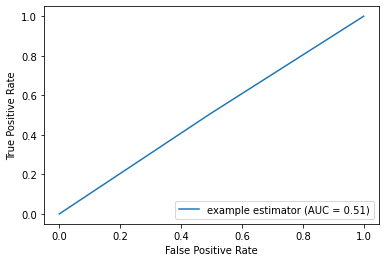

fpr: [0.         0.49466667 1.        ]
tpr: [0.         0.50533333 1.        ]
p_G_evaluated
[3.51690209e-06 7.59260166e-20 4.18123317e-09 ... 8.19453835e-08
 1.31163656e-07 1.61483627e-03]
p_R_evaluated
[2.02556941e-06 8.68689520e-12 2.86465106e-08 ... 1.93550352e-05
 5.90459511e-07 1.85995156e-04]
test1
Synth_set
            0         1         2         3         4         5         6  \
0   -1.121577  0.808859  0.187521  0.859377 -0.912491  0.014988  0.138875   
1    2.494715 -1.234323 -1.079457  0.859117 -0.188877 -1.764608  0.139657   
2    0.773244  0.808812 -1.077169  0.860690 -1.199482 -0.875293 -0.693619   
3    1.265345  0.809227 -1.077331 -1.054233 -0.658131  0.015323  0.139622   
4   -1.164137 -1.229458 -1.079457  0.860769 -1.446275 -0.872261 -0.698475   
..        ...       ...       ...       ...       ...       ...       ...   
495 -1.202249  0.810035  0.187494  0.856622  0.479553  0.016153  0.138150   
496  0.800275  0.809898  0.185590 -1.056002  1.545884  0.015272  0

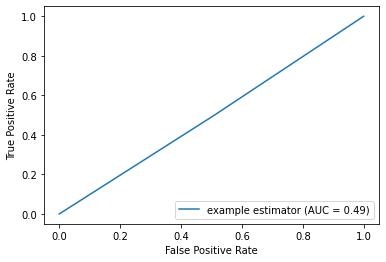

fpr: [0.    0.505 1.   ]
tpr: [0.    0.495 1.   ]
p_G_evaluated
[1.58147763e-06 9.45805133e-14 3.90820626e-08 ... 1.11671084e-08
 1.85669705e-07 1.36567040e-04]
p_R_evaluated
[2.02556941e-06 8.68689520e-12 2.86465106e-08 ... 1.93550352e-05
 5.90459511e-07 1.85995156e-04]
test1
Synth_set
            0         1         2         3         4         5         6  \
0    1.822742  0.808989  0.189668 -1.057501  2.302801  0.013907  0.138129   
1    1.620715  0.808552 -1.079457  0.858424 -0.423311 -1.764843 -1.528478   
2   -1.109726  0.808678  0.185844 -1.055378  1.160007  0.903333  1.820471   
3   -1.027940  0.809157  0.186207 -1.055346 -0.706545 -0.874378 -0.696053   
4    0.022742  0.810161  0.186041 -1.055541  0.067944  0.015121  0.137414   
..        ...       ...       ...       ...       ...       ...       ...   
495 -1.213794  0.809917  0.187506  0.856403 -0.997082  0.015459  0.137514   
496  0.924703  0.809686  0.184663 -1.057777  1.679238  0.014337  0.138932   
497 -0.505089  0.81

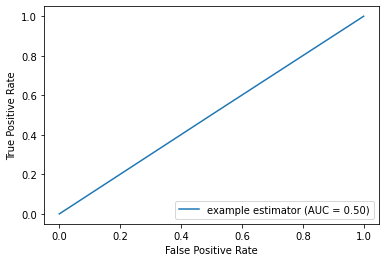

fpr: [0.         0.49933333 1.        ]
tpr: [0.         0.50066667 1.        ]
7
PAY_3
(30000, 23)
             0         1         2         3         4         5         6   \
0     -0.365981  0.810161  0.185828  0.858557 -0.703588  0.014861  0.111736   
1     -1.136720 -1.234323  0.185828 -1.057295  0.055816  0.904712  1.782348   
2     -0.674276  0.810161  0.185828 -1.057295 -0.486615  0.014861  0.111736   
3      1.792091 -1.234323 -1.079457 -1.057295 -0.161156 -1.764843 -1.558876   
4     -1.136720 -1.234323  1.451114 -1.057295  1.032193  0.014861  0.111736   
...         ...       ...       ...       ...       ...       ...       ...   
29995 -1.136720 -1.234323  0.185828 -1.057295  2.659488 -0.874991 -0.723570   
29996  2.562830 -1.234323  0.185828  0.858557 -0.595102  0.014861  0.111736   
29997 -0.905498  0.810161  0.185828  0.858557  0.815221  0.014861  0.111736   
29998  1.483795  0.810161  0.185828  0.858557  1.900084 -0.874991 -0.723570   
29999 -0.905498 -1.234323  1.45

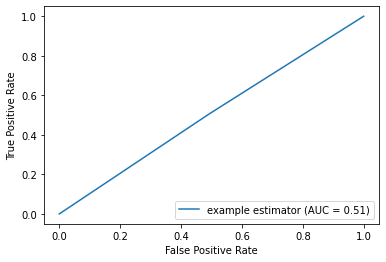

fpr: [0.         0.49333333 1.        ]
tpr: [0.         0.50666667 1.        ]
p_G_evaluated
[1.37985819e-04 1.79978106e-07 2.69339795e-08 ... 8.05098853e-07
 5.48871900e-11 1.17825163e-05]
p_R_evaluated
[5.11292449e-05 3.39597928e-07 9.85090521e-07 ... 6.89148108e-06
 6.61988920e-08 1.43829021e-05]
test1
Synth_set
            0         1         2         3         4         5         6  \
0   -1.144836  0.808728 -1.077578  0.859556 -1.002316  0.015041  0.112094   
1    0.457015  0.808768 -1.079694 -1.057525  2.683841 -0.876463 -0.720227   
2   -1.168219  0.808807  0.185886 -1.055495 -0.877061  0.906652  1.789837   
3    2.079243  0.809074  0.185925 -1.055987  1.490794  0.015322  0.112532   
4   -0.120246  0.810161 -1.078683  0.859850 -0.965226  0.015354  0.110744   
..        ...       ...       ...       ...       ...       ...       ...   
495 -1.213794  0.809981 -1.075965  0.856920 -0.608490  0.904829 -0.723388   
496  1.529712 -1.234211  1.444332 -1.057715  2.052165 -0.874890 -0

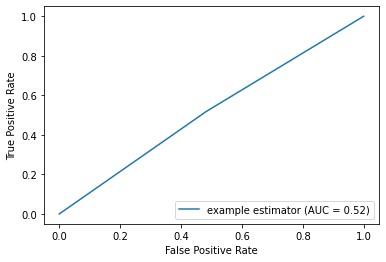

fpr: [0.         0.48233333 1.        ]
tpr: [0.         0.51766667 1.        ]


In [ ]:
arr_uci = np.array(df_uci)
def get_dataset() -> np.ndarray:
    def data_loader() -> np.ndarray:
        scaler = StandardScaler()
        X =arr_uci
        np.random.shuffle(X)
        return scaler.fit_transform(X)

    return data_loader()

dataset = get_dataset()
df_dataset = pd.DataFrame(dataset)

df_dataset.rename(columns={0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8:'8', 9:'9', 10:'10', 11:'11', 12:'12',
                        13:'13', 14:'14', 15:'15', 16:'16', 17:'17', 18:'18', 19:'19', 20:'20', 21:'21', 22:'22', 23:'23'}, inplace = True)

# metadata = SingleTableMetadata()
# metadata.detect_from_dataframe(data=df_dataset)




# #Create loop to create a metadta object for each column ablated dataframe
# metadata_objects={}
# for i, col in enumerate(df_dataset.columns):
    
#     df_temp = df_dataset.copy()
#     df_temp.drop(columns=[col], inplace=True)
    
#     metadata_name = f"metadata_{col}"
#     metadata_objects[metadata_name] = SingleTableMetadata()
#     metadata_objects[metadata_name].detect_from_dataframe(data=df_temp)

# mem_set_size = 1000 -> originally what training size was
reference_set_size = 3000 #held out set
training_epochs = [1000]
training_sizes = [3000]
#synthetic_sizes = [200]
density_estimator = "kde"  # prior, kde, bnaf
gen_size = 500 #same as synthetic_sizes

method = "TVAE"

leave_one_out_results = {}


for i, col in enumerate(df_uci):
    print(i)
    print(col)
    
    
    df_temp = df_uci.drop(df_uci.columns[i], axis=1)
    arr_uci = np.array(df_temp)
    print(arr_uci.shape)
    def get_dataset() -> np.ndarray:
        def data_loader() -> np.ndarray:
            scaler = StandardScaler()
            X =arr_uci
            np.random.shuffle(X)
            return scaler.fit_transform(X)

        return data_loader()

    dataset = get_dataset()
    df_dataset = pd.DataFrame(dataset)
    print(df_dataset)

    df_dataset.rename(columns={0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8:'8', 9:'9', 10:'10', 11:'11', 12:'12',
                            13:'13', 14:'14', 15:'15', 16:'16', 17:'17', 18:'18', 19:'19', 20:'20', 21:'21', 22:'22'}, inplace = True)

    metadata = SingleTableMetadata()
    metadata.detect_from_dataframe(data=df_dataset)

     
    arr_temp = np.array(df_dataset)
    

    
    

    # Create a dictionary to store the results for the current column
    column_results = {}

    # Set the number of iterations
    num_iterations = 5

    for iteration in range(1, num_iterations+1):
        # Initialize the result dictionary for the current iteration
        iteration_results = {}

        for training_size in training_sizes:
            # Initialize the result dictionary for the current training size
            size_results = {}

            for training_epoch in training_epochs:
                generator = get_generator(
                    gan_method=method,
                    epochs=training_epoch,
                )

                perf = evaluate_performance(
                    generator,
                    arr_temp,
                    training_size,
                    reference_set_size,
                    training_epochs=training_epoch,
                    synthetic_sizes=[gen_size],
                    density_estimator=density_estimator,
                )

                # Store the MIA performance for the current training size and epoch
                size_results[training_epoch] = perf[gen_size]["MIA_performance"]

            # Store the results for the current training size
            iteration_results[training_size] = size_results

        # Store the results for the current iteration
        column_results[iteration] = iteration_results
    
    # Store the results for the current column
    leave_one_out_results[col] = column_results
    

# Print the results
for col, results in leave_one_out_results.items():
    print(f"Column Omitted {col}:")
    for iteration, iteration_results in results.items():
        print(f"Iteration {iteration}:")
        for training_size, size_results in iteration_results.items():
            print(f"Training Size {training_size}:")
            for training_epoch, mia_performance in size_results.items():
                print(f"Training Epoch {training_epoch}: MIA Performance = {mia_performance}")
            print()

In [ ]:
# Create empty lists to store the results
iterations = []
epochs = []
srcs = []
aucrocs = []
column_ablated = []

# Iterate over the results
for col, results in leave_one_out_results.items():
    for iteration, iteration_results in results.items():
        for training_size, size_results in iteration_results.items():
            for training_epoch, mia_performance in size_results.items():
                # Append values to the lists
                iterations.append(iteration)
                epochs.append(training_epoch)
                srcs.append(list(mia_performance.keys())[8])
                aucrocs.append(list(mia_performance.values())[8]['aucroc'])
                column_ablated.append(col)  # Add the column_ablated value

# Create a list of dictionaries containing the data
data_list = [{'column_ablated': column, 'iteration': iteration, 'epoch': epoch, 'src': src, 'aucroc': aucroc}
             for column, iteration, epoch, src, aucroc in zip(column_ablated, iterations, epochs, srcs, aucrocs)]

# Create a DataFrame from the list of dictionaries
data = pd.DataFrame(data_list)

# Convert data types if needed
data['iteration'] = data['iteration'].astype(int)
data['epoch'] = data['epoch'].astype(int)
data['aucroc'] = data['aucroc'].astype(float)
data.to_csv('domias_kde_col_abl_UCI_TVAE_fix.csv')
data

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.barplot(data=data, x='column_ablated', y='aucroc' )

# Customize the plot
plt.xlabel('Column ablated')
plt.ylabel('AUC-ROC')
plt.title('MIA Performance for Column Ablation Study')
plt.ylim(ymin=0.4, ymax=0.65)
#plt.legend(title='src')
#plt.grid(True)
plt.show()

In [ ]:
mean_values = data.groupby('column_ablated')['aucroc'].mean()

print(mean_values)